# LOAN STATUS CLASSIFICATION

## 1. Defining the Question

### a) Specifying the Question

We intend to build a classification model that assesses certain specifics of the client's information for example the client’s current income, credit score, the purpose of the loan with the help of (specific) certain Machine learning algorithms to classify the data into either a good loan application or a bad loan application. This in turn helps the bank predict which loan applications to grant. We will therefore build several models and select the one that works best.

### b) Defining the Metric for Success

Our study will be considered successful if we are able to meet the below objectives.

**Main Objective**

To find the groups of people applying for loans in banks at an individual level by building an unsupervised clustering model. 

**Specific Objectives**

i.)  To determine the characteristics responsible for customer loan classification through feature selection.
ii.) To determine the maximum loan limit for certain clients based on these features.
iii.) To check for anomalies in the number of open accounts by an individual.
iv.) To make a prediction on whether a client is likely to pay off their loan or not. 
v.) To determine the most common purpose for loan application.


### c) Understanding the contex

Loan classification, risk management, and provisioning processes are closely intertwined in a bank's operations. Loan pricing, the frequency and intensity of review and analysis, the rigor of monitoring, and the tolerance for loan losses (which should be precisely proportional to the risk rating grade) are all determined by the characteristics of the various risk rating classes. They are  associated with the amount of risk indicated by a loan's assigned risk rating grade), and the amount of risk indicated by the amount of risk to absorb unforeseen losses, regulatory capital is essential. When loan classification systems are combined with management's ability to recognize negative trends, there is an improved decision making process through portfolio management and early reporting techniques.

A loan classification system is an important component of a bank's credit risk assessment and valuation process, as it classifies loans and groups of loans with comparable credit risk characteristics into risk categories. Underwriting and approval, monitoring and managing credit quality, early identification of adverse trends and potentially problem loans, loan loss provisioning, management reporting, and the determination of regulatory capital requirements are all areas where a loan classification system can be useful. Loan classification systems are recognized by both accounting frameworks and Basel II/III regulatory capital frameworks as suitable instruments for accurately assessing credit risk and establishing groupings of loans for collective evaluation for loan loss calculation.

### d). Recording the Experimental Design

### e) Data Relevance

We shall be using the datasets below:

i. Credit test dataset ( https://www.kaggle.com/code/sazack/loan-status-classification/data?select=credit_test.csv )

ii. Credit train dataset ( https://www.kaggle.com/code/sazack/loan-status-classification/data?select=credit_train.csv )

## 2. Reading the Data

In [413]:
# let's import the libraries we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split


# let's ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [414]:
# import load_data.py to read data from file

import load_data
from load_data import Data

In [415]:
# let's create an object of class Data
loan_train = Data('credit_train.csv')
loan_test = Data('credit_test.csv')

### Checking the Data

In [416]:
# lets check our data using print_results function in the load_data module
loan_train.print_results()

Checking the data...
Shape of the data...
The dataset has 100514 rows and 19 columns
What about the data...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 

In [417]:
# print results for loan_test object
loan_test.print_results()

Checking the data...
Shape of the data...
The dataset has 10353 rows and 18 columns
What about the data...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10353 entries, 0 to 10352
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       10000 non-null  object 
 1   Customer ID                   10000 non-null  object 
 2   Current Loan Amount           10000 non-null  float64
 3   Term                          10000 non-null  object 
 4   Credit Score                  8019 non-null   float64
 5   Annual Income                 8019 non-null   float64
 6   Years in current job          9573 non-null   object 
 7   Home Ownership                10000 non-null  object 
 8   Purpose                       10000 non-null  object 
 9   Monthly Debt                  10000 non-null  float64
 10  Years of Credit History       10000 non-null  float64
 11  Months since

## 3. External Data Validation



The data was provided by the bank about the brand and was based on a previous related banking data, there is no need for external validation.

## 4. Data Preparation

### a) Uniformity

In [418]:
# let's check the naming of the columns
loan_train.data.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [419]:
# let's replace the white spaces in the column names with underscore
loan_train.data.columns = [col.replace(' ', '_') for col in loan_train.data.columns]
loan_test.data.columns = [col.replace(' ', '_') for col in loan_test.data.columns]

In [420]:
# let's check the naming of the columns again
loan_train.data.columns

Index(['Loan_ID', 'Customer_ID', 'Loan_Status', 'Current_Loan_Amount', 'Term',
       'Credit_Score', 'Annual_Income', 'Years_in_current_job',
       'Home_Ownership', 'Purpose', 'Monthly_Debt', 'Years_of_Credit_History',
       'Months_since_last_delinquent', 'Number_of_Open_Accounts',
       'Number_of_Credit_Problems', 'Current_Credit_Balance',
       'Maximum_Open_Credit', 'Bankruptcies', 'Tax_Liens'],
      dtype='object')

* The data is already in a uniform format.

### b) Completeness

In [421]:
# let's check the data for missing values and output as percentage
missing_values = loan_train.data.isnull().sum().sort_values(ascending=False)
percentage = missing_values / loan_train.data.shape[0] * 100

# create a dataframe with the missing values and percentage
missing_values_df = pd.DataFrame({'Missing_Values': missing_values, 'Percentage': percentage})
missing_values_df

,Missing_Values,Percentage
Months_since_last_delinquent,53655,53.380624
Credit_Score,19668,19.567423
Annual_Income,19668,19.567423
Years_in_current_job,4736,4.711781
Bankruptcies,718,0.714328
Tax_Liens,524,0.521320
Maximum_Open_Credit,516,0.513361
Years_of_Credit_History,514,0.511372
Current_Credit_Balance,514,0.511372
Number_of_Credit_Problems,514,0.511372


* The data has alot of missing values

In [422]:
# let's drop the Months_since_last_delinquent column
loan_train.data.drop('Months_since_last_delinquent', axis=1, inplace=True)

In [423]:
# let's impute Credit_Score and Annual_Income with the median
loan_train.data['Credit_Score'].fillna(loan_train.data['Credit_Score'].median(), inplace=True)
loan_train.data['Annual_Income'].fillna(loan_train.data['Annual_Income'].median(), inplace=True)

In [424]:
# let's check the data for missing values and output as percentage
missing_values = loan_train.data.isnull().sum().sort_values(ascending=False)
percentage = missing_values / loan_train.data.shape[0] * 100

# create a dataframe with the missing values and percentage
missing_values_df = pd.DataFrame({'Missing_Values': missing_values, 'Percentage': percentage})
missing_values_df

,Missing_Values,Percentage
Years_in_current_job,4736,4.711781
Bankruptcies,718,0.714328
Tax_Liens,524,0.521320
Maximum_Open_Credit,516,0.513361
Monthly_Debt,514,0.511372
Current_Credit_Balance,514,0.511372
Number_of_Credit_Problems,514,0.511372
Number_of_Open_Accounts,514,0.511372
Years_of_Credit_History,514,0.511372
Loan_ID,514,0.511372


In [425]:
# let's drop the remmaining missing values
loan_train.data.dropna(inplace=True)

In [426]:
# let's check the data for missing values 
loan_train.data.isnull().sum().sum()

0

* The data does not have any missing values.

### c) Consistency

In [427]:
# let's check the data for duplicate values as a percentage
duplicate_values = loan_train.data.duplicated().sum()
percentage = duplicate_values / loan_train.data.shape[0] * 100

print(f"The data has {duplicate_values} duplicate values and {percentage}% of the data")

The data has 9781 duplicate values and 10.234169003473822% of the data


* We will drop the duplicates.

In [428]:
# let's drop the duplicate values
loan_train.data.drop_duplicates(inplace=True)

In [429]:
# let's check the data for duplicate values 
loan_train.data.duplicated().sum().sum()

0

* The data does not have duplicate values.

### d) Accuracy

In [430]:
# let's check the datatypes of the data
loan_train.data.dtypes

# let's drop customer id and loan id
loan_train.data.drop(['Customer_ID', 'Loan_ID'], axis=1, inplace=True)

In [431]:
# let's convert Loan_Status and Term to binary
loan_train.data['Loan_Status'] = loan_train.data['Loan_Status'].map({'Fully Paid': 1, 'Charged Off': 0})
loan_train.data['Term'] = loan_train.data['Term'].map({'Short Term': 0, 'Long Term': 1})
loan_train.data_head()

,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,1,445412.0,0,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,1,262328.0,0,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,1,99999999.0,0,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,1,347666.0,1,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,1,176220.0,0,724.0,1174162.0,5 years,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0


### e) Anomalies

In [432]:
# let's create a variable to store all columns with numeric data types
numeric_columns = [col for col in loan_train.data.columns if loan_train.data[col].dtype in ['int64', 'float64']]
numeric_columns

['Loan_Status',
 'Current_Loan_Amount',
 'Term',
 'Credit_Score',
 'Annual_Income',
 'Monthly_Debt',
 'Years_of_Credit_History',
 'Number_of_Open_Accounts',
 'Number_of_Credit_Problems',
 'Current_Credit_Balance',
 'Maximum_Open_Credit',
 'Bankruptcies',
 'Tax_Liens']

In [433]:
# let's remove loan status and term from the numeric columns
numeric_columns.remove('Loan_Status')
numeric_columns.remove('Term')

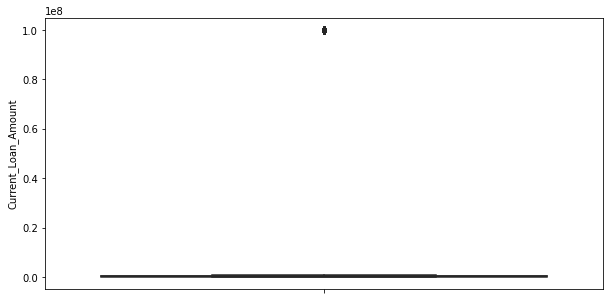

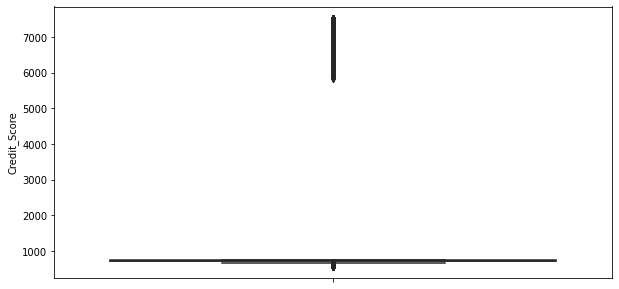

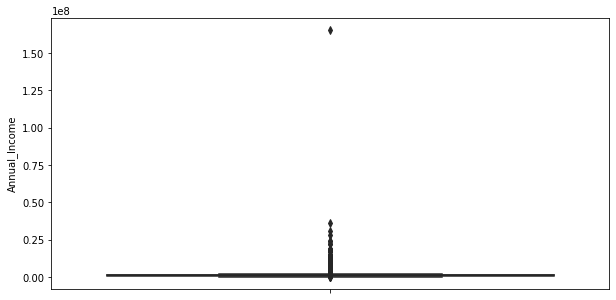

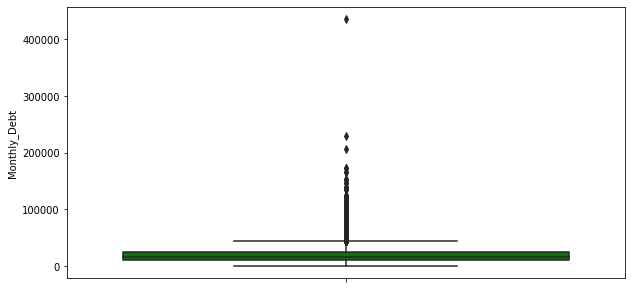

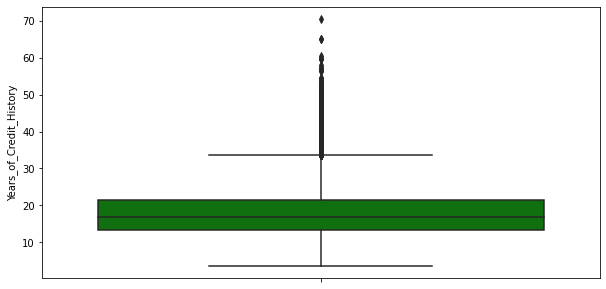

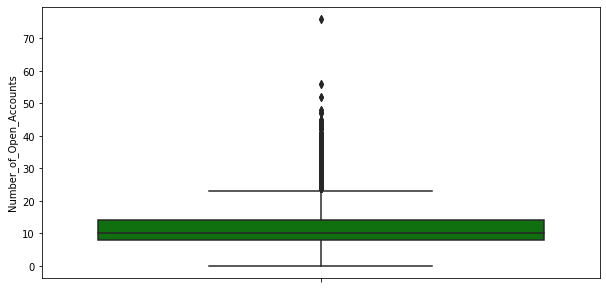

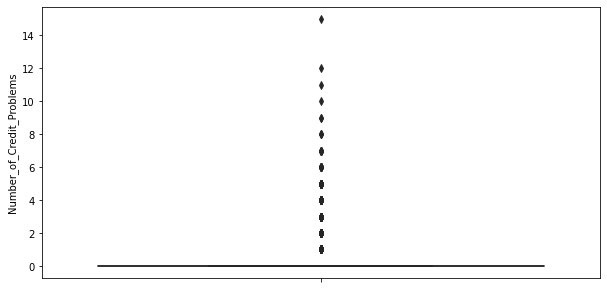

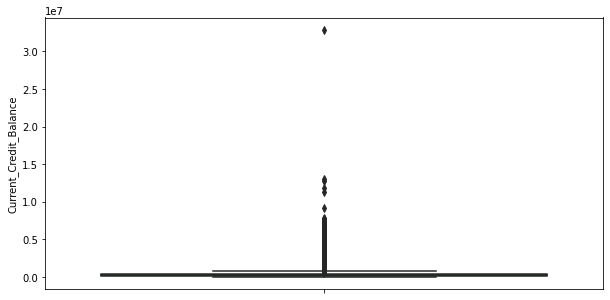

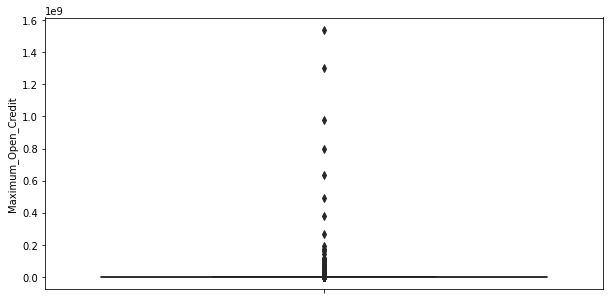

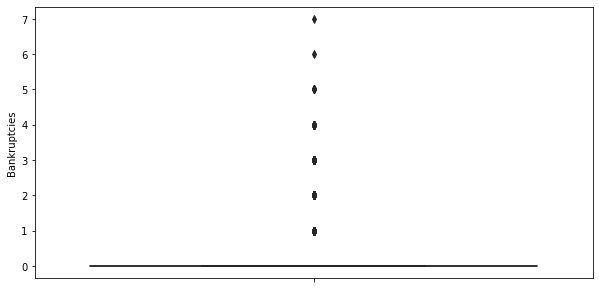

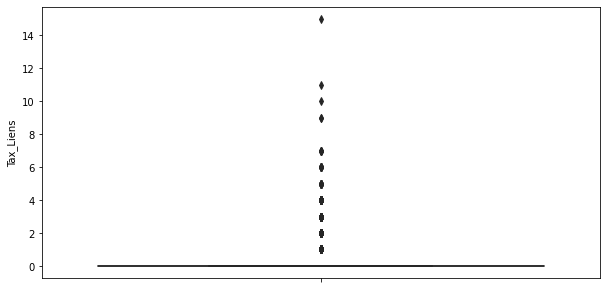

In [434]:
# let's check the columns with outliers using a boxplot using a for loop for numeric columns in a vertical orientation using seaborn
for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot( y=loan_train.data[col], orient='h', color='green')
    plt.show()

* The data has outliers which will not be dropped because they represent the actual values in the data.

In [435]:
# since credit score values should range from 300 to 850, let's replace divide values larger than 850 in the credit score column by 10

loan_train.data['Credit_Score'] = loan_train.data['Credit_Score'].apply(lambda val: (val /10) if val>850 else val)

# check for null values in the Credit_Score column
loan_train.data['Credit_Score'].isnull().sum()

0

In [436]:
205/10

20.5

In [437]:
# credit score datatype
loan_train.data['Credit_Score'].dtype

# unique values in the Credit_Score column
loan_train.data['Credit_Score'].unique()

array([709., 724., 741., 721., 729., 730., 678., 739., 728., 740., 743.,
       727., 723., 747., 687., 750., 714., 704., 688., 749., 746., 737.,
       733., 725., 745., 720., 718., 682., 712., 680., 710., 598., 719.,
       661., 652., 736., 738., 644., 672., 699., 751., 694., 657., 748.,
       666., 734., 742., 705., 624., 685., 717., 722., 618., 676., 692.,
       732., 649., 695., 744., 686., 637., 697., 706., 715., 707., 726.,
       716., 702., 651., 708., 698., 689., 703., 693., 645., 691., 700.,
       731., 658., 735., 674., 654., 681., 696., 713., 668., 659., 647.,
       683., 675., 670., 623., 711., 639., 671., 614., 667., 615., 656.,
       653., 664., 613., 636., 594., 646., 669., 701., 612., 673., 690.,
       641., 665., 677., 684., 655., 630., 663., 638., 596., 660., 679.,
       609., 603., 643., 633., 586., 629., 648., 640., 625., 635., 662.,
       627., 611., 604., 642., 621., 632., 602., 616., 600., 650., 597.,
       622., 610., 619., 628., 599., 606., 608., 62

## 5. Exploratory Data Analysis

### a) Univariate Analysis

In [438]:
# let's print the description of the data
loan_train.data.describe()

,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
count,85791.000000,8.579100e+04,85791.000000,85791.000000,8.579100e+04,85791.000000,85791.000000,85791.000000,85791.000000,8.579100e+04,8.579100e+04,85791.000000,85791.000000
mean,0.751547,1.312880e+07,0.270075,719.713268,1.349192e+06,18641.047257,18.037267,11.179529,0.159143,2.962821e+05,7.748651e+05,0.110816,0.027719
std,0.432118,3.336658e+07,0.444001,25.096432,9.962933e+05,12197.799878,6.815781,5.007267,0.469544,3.737015e+05,8.932842e+06,0.341166,0.251168
min,0.000000,1.542200e+04,0.000000,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.000000,1.858560e+05,0.000000,713.000000,9.500950e+05,10404.590000,13.400000,8.000000,0.000000,1.146270e+05,2.794110e+05,0.000000,0.000000
50%,1.000000,3.204740e+05,0.000000,724.000000,1.174162e+06,16363.560000,16.900000,10.000000,0.000000,2.120970e+05,4.764760e+05,0.000000,0.000000
75%,1.000000,5.362060e+05,1.000000,737.000000,1.512400e+06,24157.455000,21.500000,14.000000,0.000000,3.707755e+05,7.950250e+05,0.000000,0.000000
max,1.000000,1.000000e+08,1.000000,751.000000,1.655574e+08,435843.280000,70.500000,76.000000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [439]:
# let's check for skewness of the data
skew_df = pd.DataFrame({'Skew': loan_train.data[numeric_columns].apply(lambda x: x.skew())})
skew_df

,Skew
Current_Loan_Amount,2.219423
Credit_Score,-1.757022
Annual_Income,56.211964
Monthly_Debt,2.278639
Years_of_Credit_History,1.026573
Number_of_Open_Accounts,1.180051
Number_of_Credit_Problems,4.966310
Current_Credit_Balance,14.799388
Maximum_Open_Credit,127.265619
Bankruptcies,3.578498


* The variables are right skewed. The values are positive.

In [440]:
# let's check for kurtosis of the data
kurtosis_df = pd.DataFrame({'Kurtosis': loan_train.data[numeric_columns].apply(lambda x: x.kurtosis())})
kurtosis_df

,Kurtosis
Current_Loan_Amount,2.926143
Credit_Score,3.959571
Annual_Income,8667.271072
Monthly_Debt,24.318686
Years_of_Credit_History,1.645755
Number_of_Open_Accounts,3.083973
Number_of_Credit_Problems,51.441956
Current_Credit_Balance,789.748847
Maximum_Open_Credit,18435.876851
Bankruptcies,18.902574


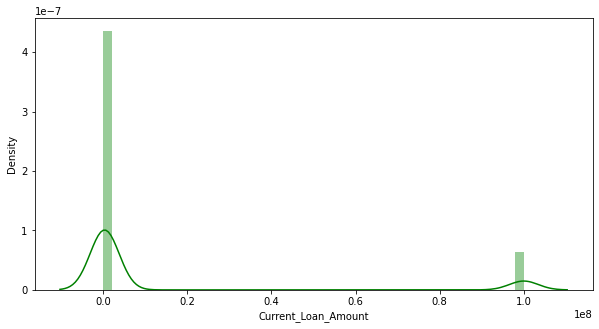

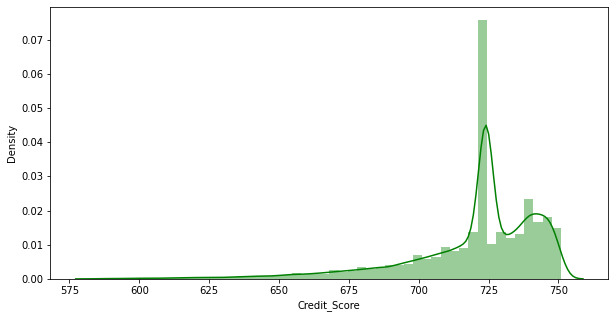

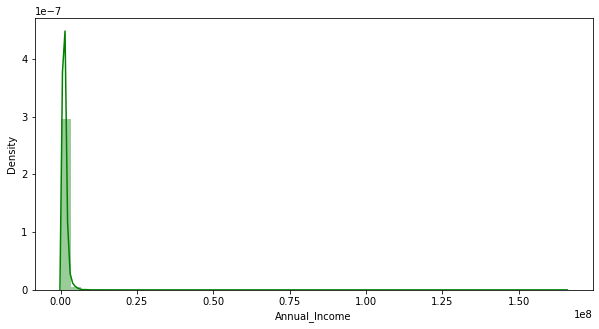

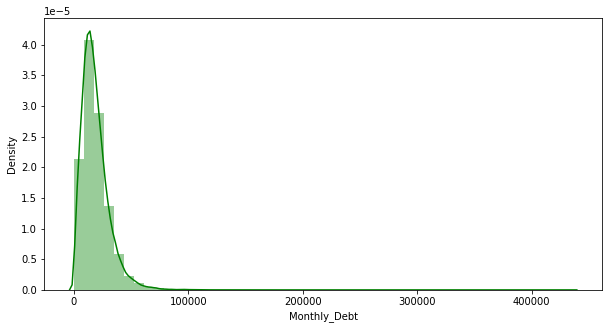

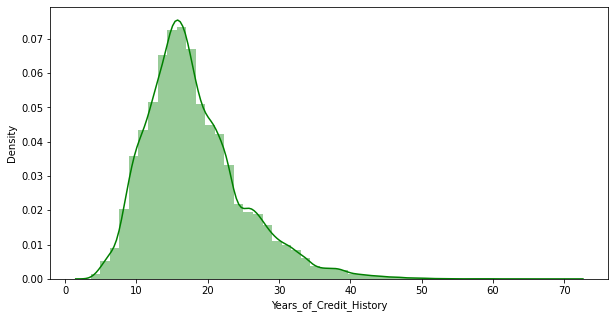

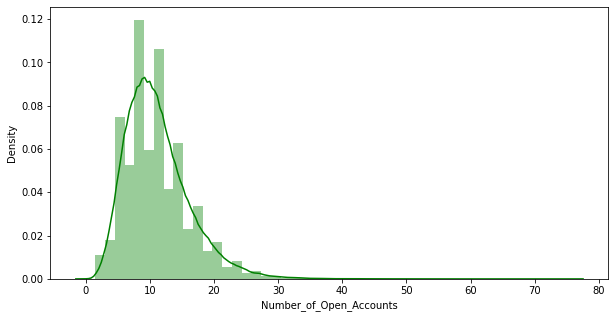

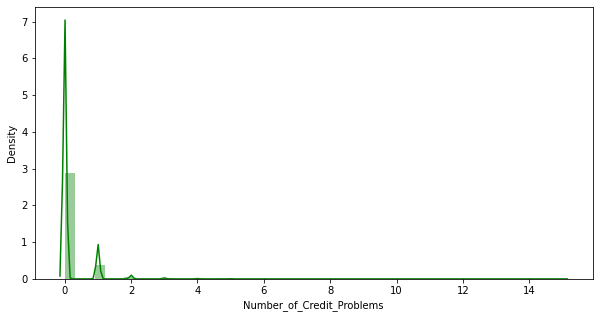

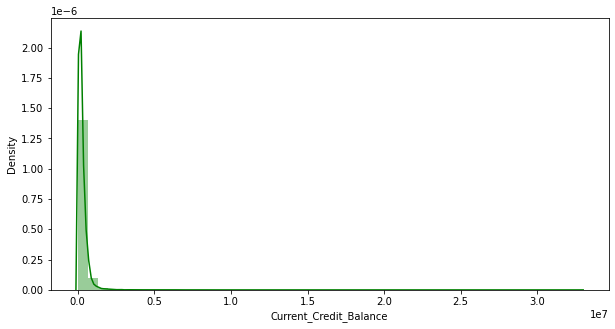

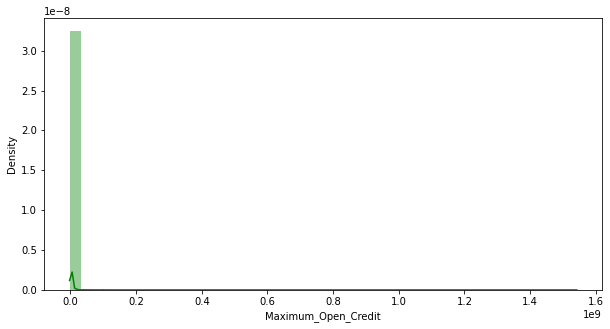

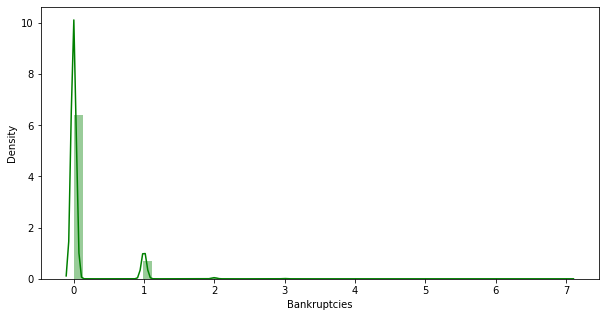

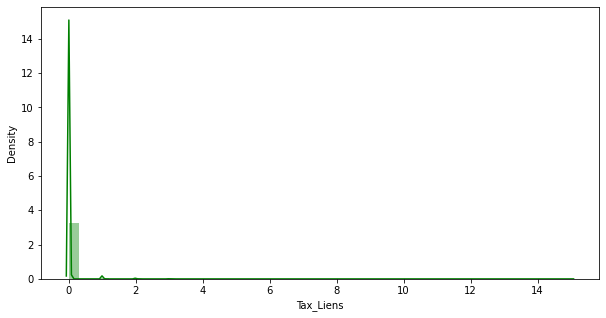

In [441]:
# let's get the distribution plot of the data using a for loop of numeric columns
for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.distplot(loan_train.data[col], color='green')
    plt.show()

* The data is positively skewed and leptokurtic.

In [442]:
# let's store the columns with object data types in a variable
cat_columns = [col for col in loan_train.data.columns if loan_train.data[col].dtype == 'object']
cat_columns

['Years_in_current_job', 'Home_Ownership', 'Purpose']

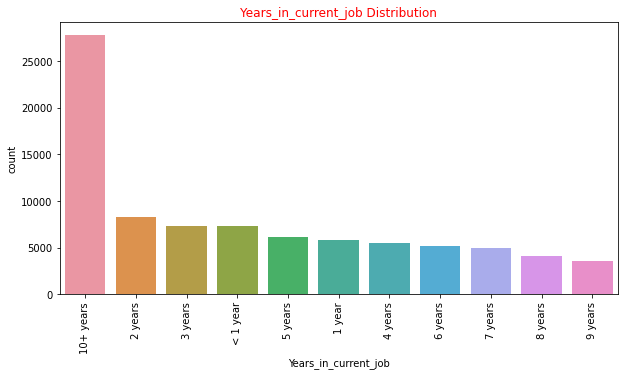

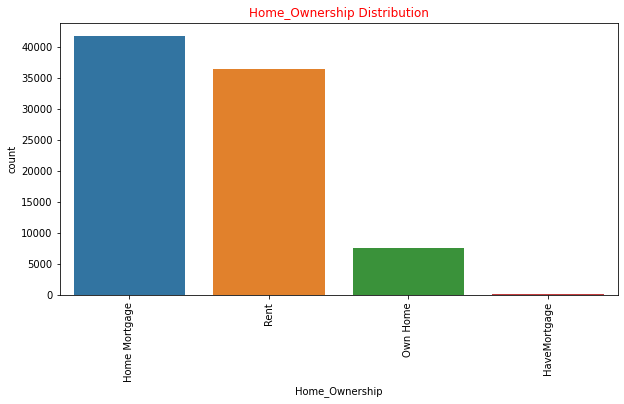

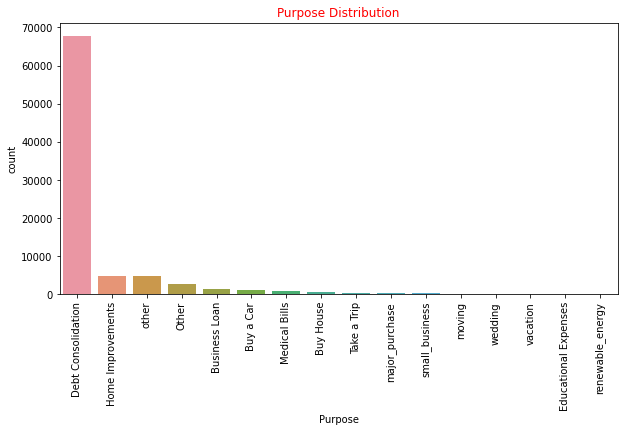

In [443]:
# let's plot a bar graph of the data using a for loop of categorical columns
for col in cat_columns:
    plt.figure(figsize=(10, 5))
    plt.xticks(rotation=90)
    sns.countplot(x=col, data=loan_train.data, order= loan_train.data[col].value_counts().index)
    plt.title(f'{col} Distribution', color='red')
    plt.show()

The most common purpose of taking loans is debt consolidation.

### b) Bivariate Analysis

#### Categorical vs Categorical Features

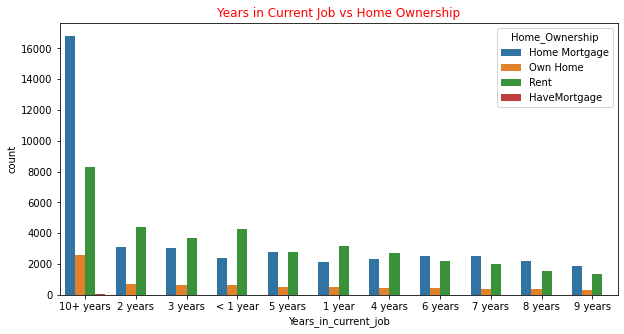

In [444]:
# categorical vs categorical

# let's create a stack barplot of years in current job and home ownership and sort in descending order

plt.figure(figsize=(10, 5))
sns.countplot(x='Years_in_current_job', hue='Home_Ownership', data=loan_train.data,
              order=loan_train.data['Years_in_current_job'].value_counts().index)
plt.title('Years in Current Job vs Home Ownership', color='red')
plt.show()

#### Categorical vs Numerical Features

In [445]:
loan_train.data.columns

Index(['Loan_Status', 'Current_Loan_Amount', 'Term', 'Credit_Score',
       'Annual_Income', 'Years_in_current_job', 'Home_Ownership', 'Purpose',
       'Monthly_Debt', 'Years_of_Credit_History', 'Number_of_Open_Accounts',
       'Number_of_Credit_Problems', 'Current_Credit_Balance',
       'Maximum_Open_Credit', 'Bankruptcies', 'Tax_Liens'],
      dtype='object')

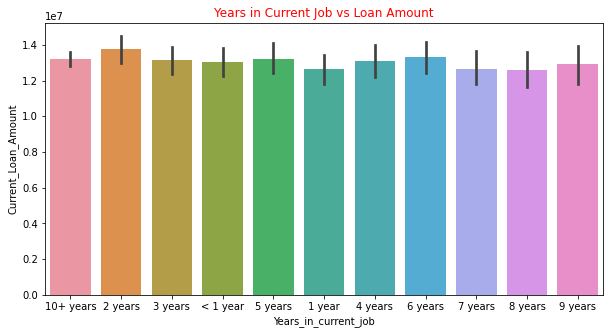

In [446]:
# Categorical vs Numeric

# let's create a barplot of Years in current job and Loan Amount
plt.figure(figsize=(10, 5))
sns.barplot(x='Years_in_current_job', y='Current_Loan_Amount', data=loan_train.data,
            order=loan_train.data['Years_in_current_job'].value_counts().index)
plt.title('Years in Current Job vs Loan Amount', color='red')
plt.show()


#### Numerical vs Numerical Features

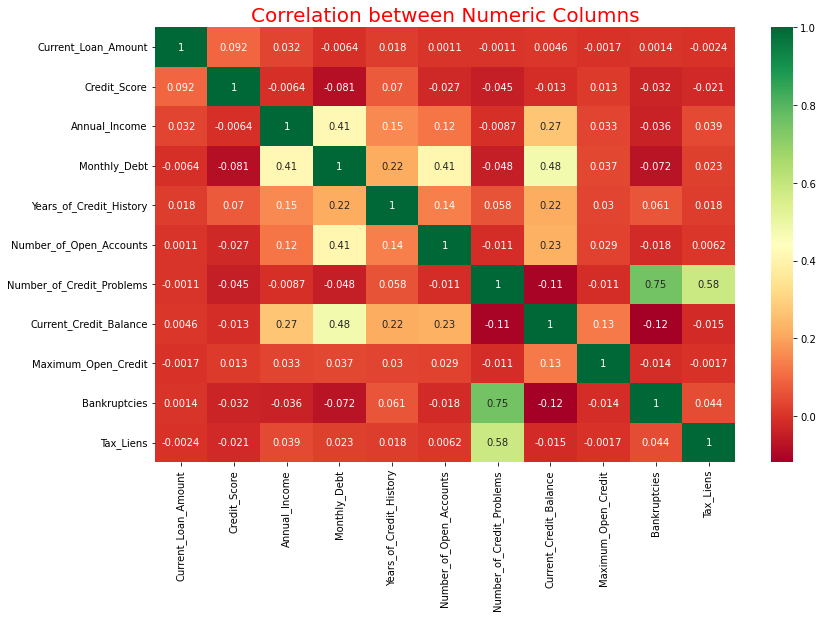

In [447]:
# Numerical vs Numerical: 
# 
# Covariance, Correlation and Scatter Plot

# let's get plot a heatmap of the correlation between the numeric columns
plt.figure(figsize=(13, 8))
sns.heatmap(loan_train.data[numeric_columns].corr(), annot=True, cmap='RdYlGn')
plt.title('Correlation between Numeric Columns', color='red', fontsize=20)
plt.show()


Bankruptcies and tax liens are highly correlated to number of credit problems.

<Figure size 936x576 with 0 Axes>

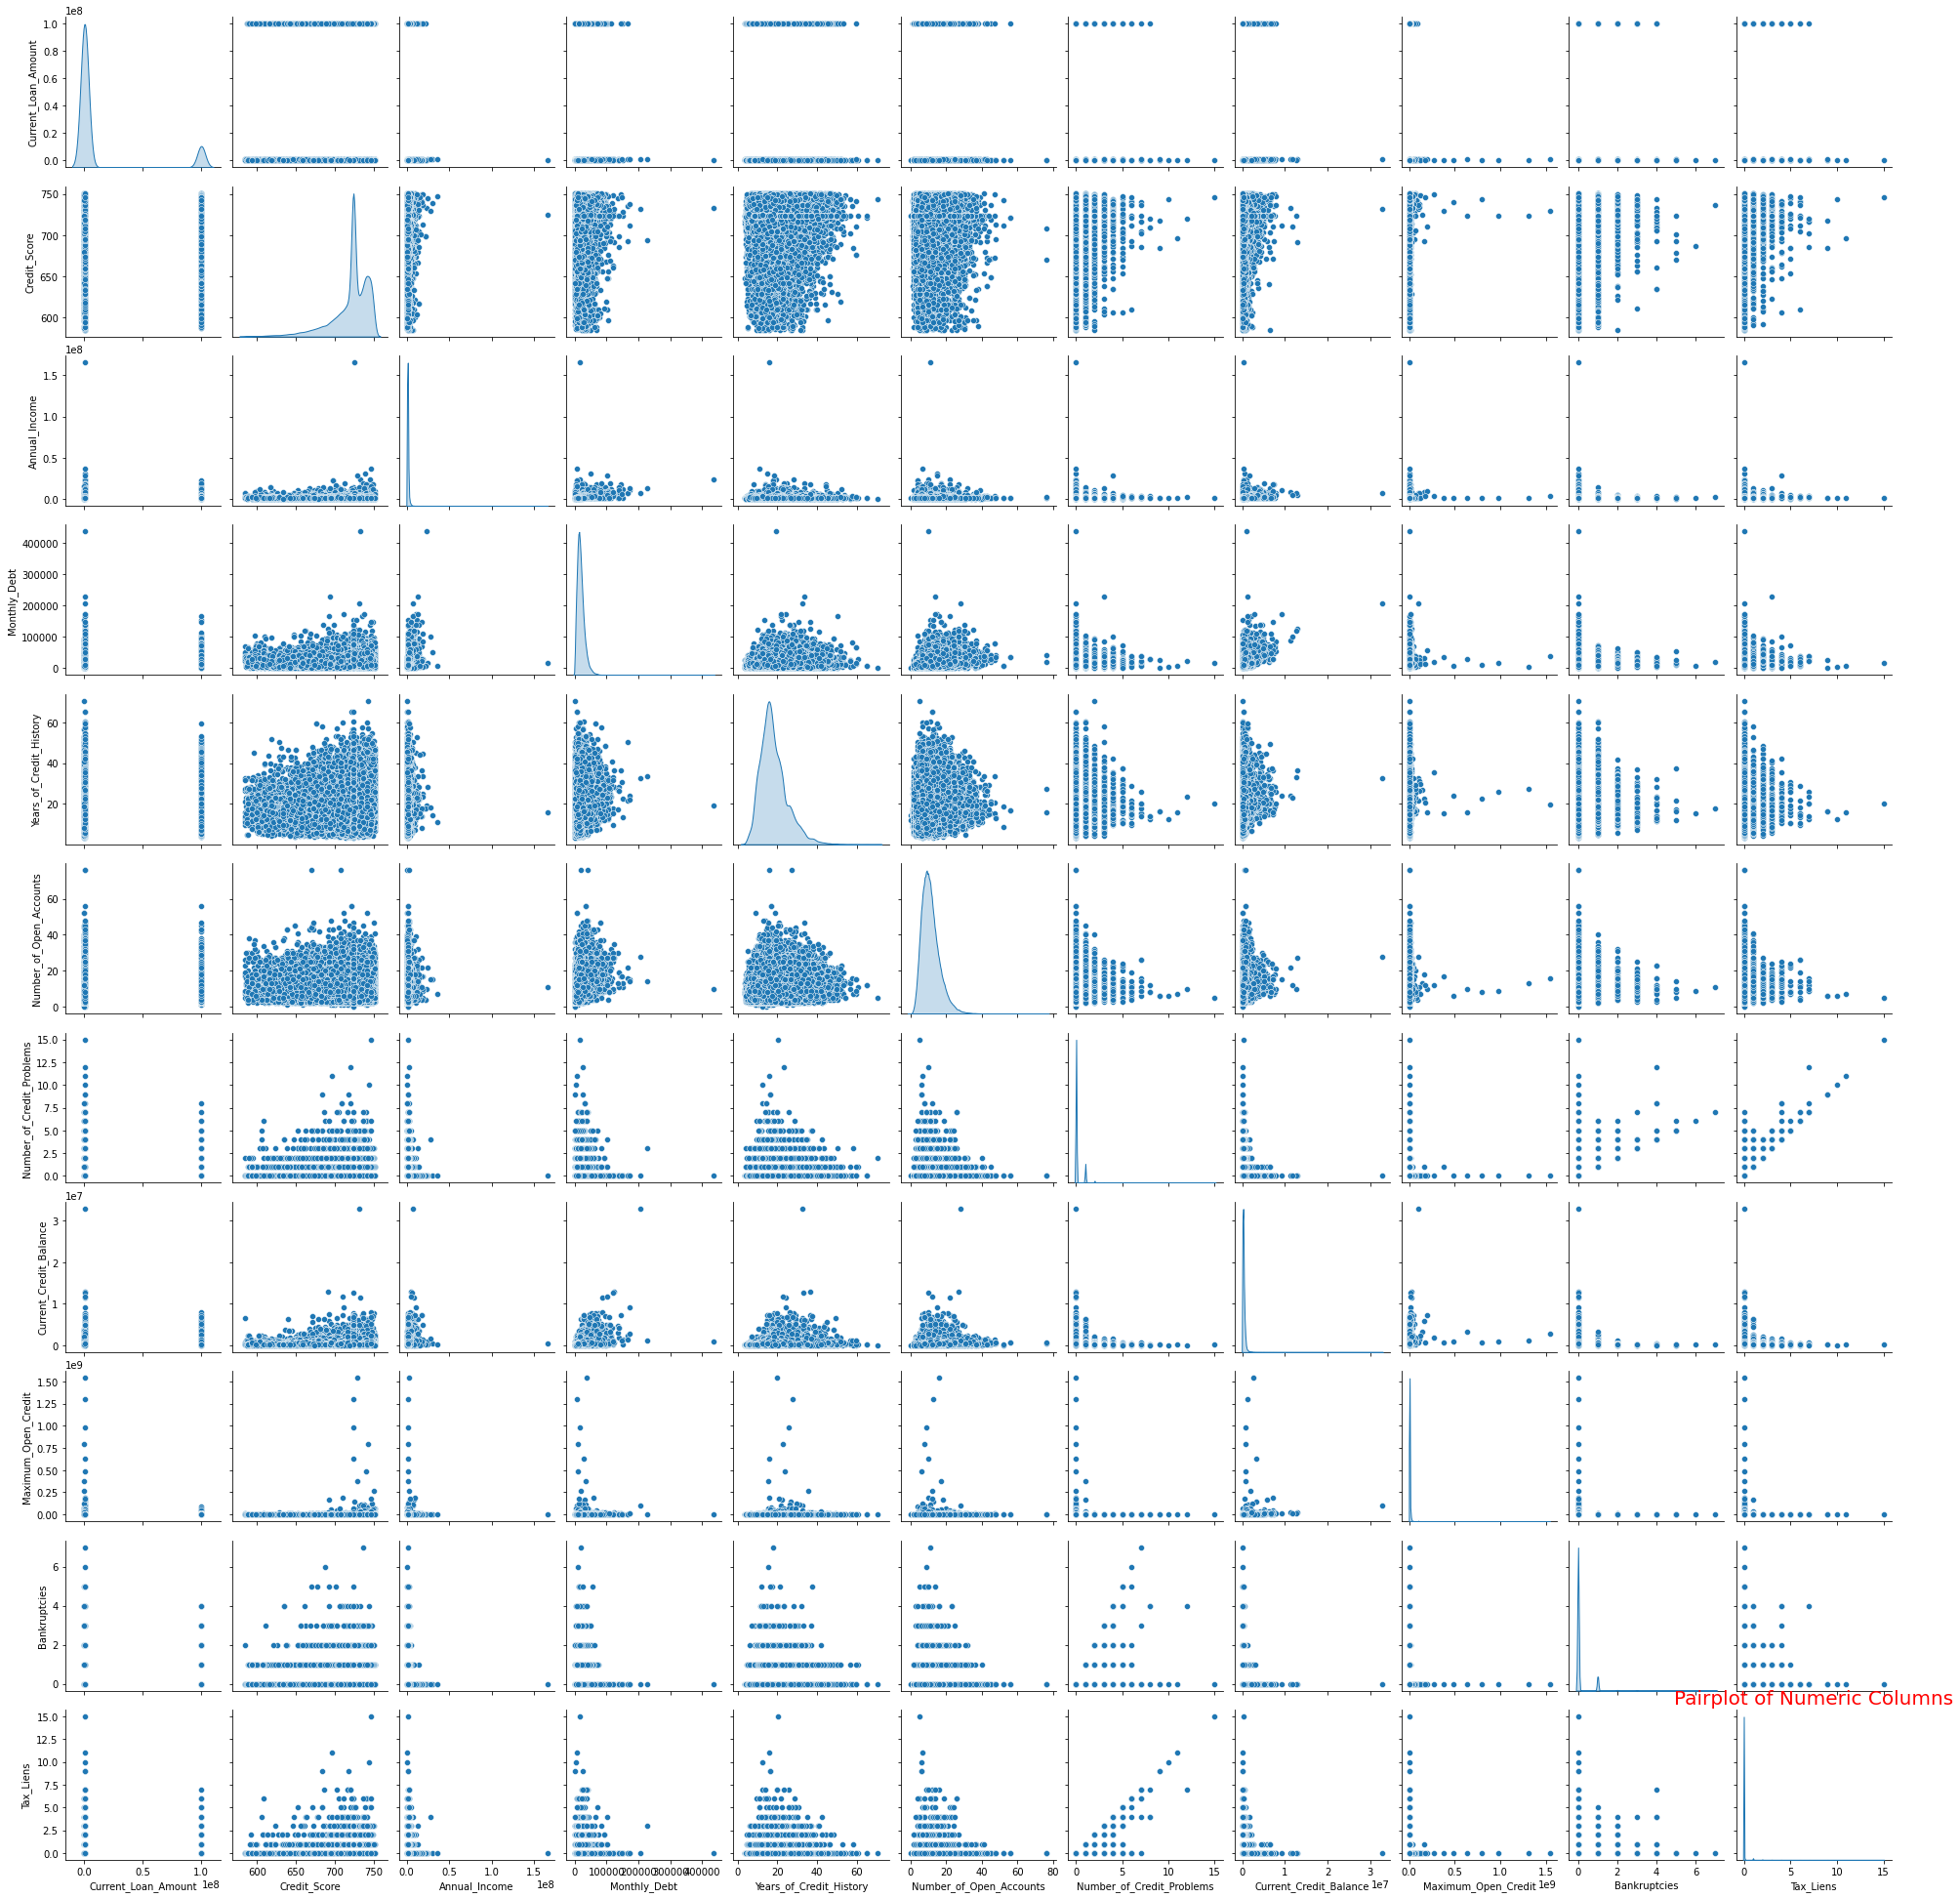

In [448]:
# let's plot the pairplot of the numeric columns
plt.figure(figsize=(13, 8))
sns.pairplot(loan_train.data[numeric_columns], diag_kind='kde', palette='husl')
plt.title('Pairplot of Numeric Columns', color='red', fontsize=20)
plt.show()

## 6. Modeling

### Feature Engineering

In [449]:
# let's encode the categorical columns

# import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# create a label encoder object
le = LabelEncoder()

# let's create a function to encode the categorical columns
def encode_cat_columns(data):
    for col in cat_columns:
        data[col] = le.fit_transform(data[col])
    return data

# let's encode the categorical columns
loan_train.data = encode_cat_columns(loan_train.data)
loan_train.data_head()

,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,1,445412.0,0,709.0,1167493.0,8,1,5,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,1,262328.0,0,724.0,1174162.0,1,1,3,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,1,99999999.0,0,741.0,2231892.0,8,2,3,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,1,347666.0,1,721.0,806949.0,3,2,3,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,1,176220.0,0,724.0,1174162.0,5,3,3,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0


we shall replace all values in the credit score variable as follows:
 * values between 300 and 579 with 1 for 'poor'
 * values between 580 and 669 with 2 for 'fair'
 * values between 670 and 739 with 3 for 'good'
 * values between 740 and 799 with 4 for 'very good'
 * values of 800 and above with 5 for 'excellent'


Since our dataset has credit scores ranging from  585 to 751, we shall only have 3 classes i.e second,third and fourth.
Hence we shall take first class as 0, second as 1 and third as 2.

In [450]:
# let's create an empty column called credit class
loan_train.data['Credit_Class'] = 0

In [451]:
# a functtion to populate the credit class column
def classify_credit_score(data):

    data.loc[(data['Credit_Score'] >= 580) & (data['Credit_Score'] <= 669), 'Credit_Class'] = 0
    data.loc[(data['Credit_Score'] >= 670) & (data['Credit_Score'] <= 739), 'Credit_Class'] = 1
    data.loc[(data['Credit_Score'] >= 740) & (data['Credit_Score'] <= 799), 'Credit_Class'] = 2
   
    return data.head()


In [452]:
# let's populate the credit class column with proper values
classify_credit_score(loan_train.data)

,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Credit_Class
0,1,445412.0,0,709.0,1167493.0,8,1,5,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0,1
1,1,262328.0,0,724.0,1174162.0,1,1,3,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0,1
2,1,99999999.0,0,741.0,2231892.0,8,2,3,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0,2
3,1,347666.0,1,721.0,806949.0,3,2,3,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0,1
4,1,176220.0,0,724.0,1174162.0,5,3,3,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0,1


* We created a column Credit_Class and populated it with values corresponding to the credit score in a range from 1 to 5.

<AxesSubplot:xlabel='Credit_Class', ylabel='count'>

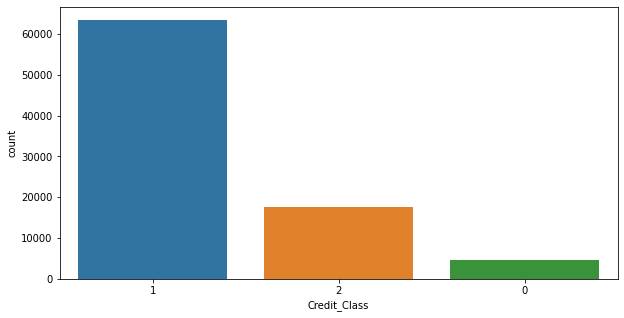

In [453]:
# let's check the credit class column
loan_train.data['Credit_Class'].value_counts()

# let's plot a bar graph of the credit class column
plt.figure(figsize=(10, 5))
sns.countplot(x='Credit_Class', data=loan_train.data, order=loan_train.data['Credit_Class'].value_counts().index)

The proportion of individuals in our dataset with a credit score between 670 and 739 is highest. We shall solve this imbalance using smote approach.

In [457]:
# pip install imbalanced-learn

# import smote(synthetic minority over-sampling) 
from imblearn.over_sampling import SMOTE

# import counter
from collections import Counter

# define independent and dependent variables
X = loan_train.data.drop(['Credit_Score','Credit_Class'], axis=1)    # independent variables
y = loan_train.data['Credit_Class']     # dependent variables

# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

# summarize the new class distribution
counter = Counter(y)
print(counter)

# scatter plot of examples by class label
'''for label, _ in counter.items():
	row_ix = np.where(y == label)[0]
	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()'''

Counter({1: 63439, 2: 63439, 0: 63439})


'for label, _ in counter.items():\n\trow_ix = np.where(y == label)[0]\n\tplt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))\nplt.legend()\nplt.show()'

### a) Supervised Learning Approach

In [458]:
# let's split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [459]:
# standardize the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [461]:
# get shape of our x_train and x_test
print(X_train.shape)
print(X_test.shape)

(152253, 15)
(38064, 15)


#### Logistic Regression Model


In [460]:
# import logistic regression model
from sklearn.linear_model import LogisticRegression

# create a logistic regression object
logreg = LogisticRegression()

# fit model to our data
logreg.fit(X_train, y_train)

# let's predict the test data
y_pred = logreg.predict(X_test)

# let's check the accuracy of the model using confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[8982, 1932, 1829],
       [3091, 5061, 4467],
       [ 445, 2479, 9778]], dtype=int64)

In [475]:
# let's check the accuracy of the model using classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.94      0.93     12743
           1       0.87      0.78      0.82     12619
           2       0.84      0.90      0.87     12702

    accuracy                           0.87     38064
   macro avg       0.87      0.87      0.87     38064
weighted avg       0.87      0.87      0.87     38064



In [465]:
# get f1 score
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

0.6167554107785329

In [466]:
# get recall score to check for sensitivity of our model

from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='weighted')

0.6258144178226146

Our model predicted 23,821 observations out of 38,064 observations correctly resulting in 62.58% recall which represents the ability of the model to find relevant cases in the data and an f1 score of 61.67%.

In [467]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv = 10, scoring= 'f1_weighted')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.61587246 0.60863856 0.61661274 0.61806277 0.61551055 0.62111607
 0.62079555 0.61701692 0.62359421 0.61748084]


In [468]:
# get average f1 scores
print('Average F1 score:{}'.format(scores.mean()))

Average F1 score:0.6174700670032969


Our logistic regression model is not giving the best results hence we shall use other algorithms to improve our results.

#### Random Forest Model

In [469]:

# import random forest model
from sklearn.ensemble import RandomForestClassifier

# create a random forest object
rf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to our data
rf.fit(X_train, y_train)

# let's predict the test data
y_pred = rf.predict(X_test)

# let's check the accuracy of the model using confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[12032,   371,   340],
       [  926,  9843,  1850],
       [  165,  1133, 11404]], dtype=int64)

In [470]:
# get the recall score
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='weighted')

0.8742906683480454

In [471]:
# let's check model performance using f1 score
from sklearn.metrics import f1_score 
f1_score(y_test, y_pred, average='weighted')

0.8732086718875007

Our random forest model has classified 33279 out of 38064 and has an f1_score of 87.32%.

In [474]:
# let's check the accuracy of the model using classification report	
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93     12743
           1       0.87      0.78      0.82     12619
           2       0.84      0.90      0.87     12702

    accuracy                           0.87     38064
   macro avg       0.87      0.87      0.87     38064
weighted avg       0.87      0.87      0.87     38064



In [476]:
# Get numerical feature importances

test_features = X.columns.to_list()

# pick a specific tree from the forest
tree = rf.estimators_[50]

importances = list(tree.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('Loan_Status', 0.03), ('Current_Loan_Amount', 0.08), ('Term', 0.17), ('Annual_Income', 0.16), ('Years_in_current_job', 0.04), ('Home_Ownership', 0.03), ('Purpose', 0.04), ('Monthly_Debt', 0.08), ('Years_of_Credit_History', 0.08), ('Number_of_Open_Accounts', 0.07), ('Number_of_Credit_Problems', 0.04), ('Current_Credit_Balance', 0.08), ('Maximum_Open_Credit', 0.09), ('Bankruptcies', 0.01), ('Tax_Liens', 0.0)]

Variable: Term                 Importance: 0.17
Variable: Annual_Income        Importance: 0.16
Variable: Maximum_Open_Credit  Importance: 0.09
Variable: Current_Loan_Amount  Importance: 0.08
Variable: Monthly_Debt         Importance: 0.08
Variable: Years_of_Credit_History Importance: 0.08
Variable: Current_Credit_Balance Importance: 0.08
Variable: Number_of_Open_Accounts Importance: 0.07
Variable: Years_in_current_job Importance: 0.04
Variable: Purpose              Importance: 0.04
Variable: Number_of_Credit_Problems Importance: 0.04
Variable: Loan_Status          Importance: 0.

#### XGBoost classifier model

In [477]:
# import xgboost model
from xgboost import XGBClassifier

# create a xgboost object
xgb = XGBClassifier(eval_metric='mlogloss', learning_rate=0.300000012, max_depth=6, n_estimators=500, n_jobs=16, random_state=0)

# fit the model to our data
xgb.fit(X_train, y_train)

# let's predict the test data
y_pred = xgb.predict(X_test)

# let's check the accuracy of the model using confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))


array([[11552,   725,   466],
       [  257, 11283,  1079],
       [  253,  1619, 10830]], dtype=int64)

In [478]:
#  get f1 score
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

0.8850892827397495

In [479]:
# let's check the accuracy of the model using classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93     12743
           1       0.83      0.89      0.86     12619
           2       0.88      0.85      0.86     12702

    accuracy                           0.88     38064
   macro avg       0.89      0.88      0.88     38064
weighted avg       0.89      0.88      0.89     38064



The xgboost model correctly classifies 33,665 out of 38,064 observations correctly with an f1 score of 88.5%. 

### Unsupervised learning Approach


#### Feature Selection


[0.04474467 0.08917516 0.15485031 0.11171453 0.04925765 0.03961847
 0.04914078 0.07696538 0.07987609 0.0760537  0.02411847 0.08151823
 0.0945806  0.02367105 0.0047149 ]


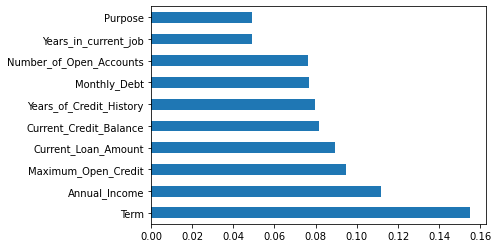

In [480]:
# import TreeClassifier 
from sklearn.ensemble import ExtraTreesClassifier

# create a tree classifier object
model = ExtraTreesClassifier()

# fit the model to our data
model.fit(X, y)

# use inbuilt class feature_importances of tree based classifiers
print(model.feature_importances_)

#plot graph of feature importances of the 10 most important features  for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', color='orange', figsize=(12, 12), title='Feature Importances', fontsize=12)
plt.show()

#### KMeans model

In [481]:
# let's drop target variable from the data
loan_train_ind = loan_train.data.drop(['Credit_Class'], axis=1)
loan_train_ind.head()

,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,1,445412.0,0,709.0,1167493.0,8,1,5,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,1,262328.0,0,724.0,1174162.0,1,1,3,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,1,99999999.0,0,741.0,2231892.0,8,2,3,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,1,347666.0,1,721.0,806949.0,3,2,3,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,1,176220.0,0,724.0,1174162.0,5,3,3,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0


##### Let's find optimal number of clusters to use in our model:
<b> i) Elbow Method </b>


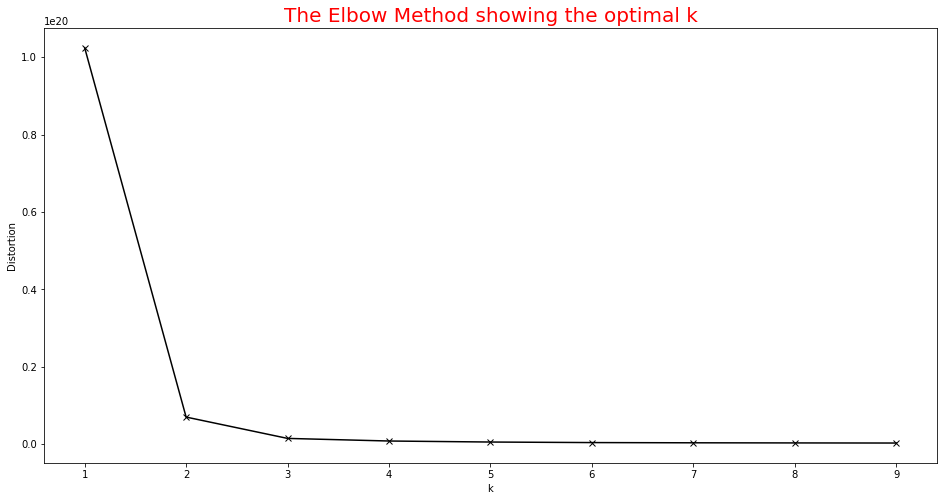

In [483]:
# let's find the optimal value of k using elbow method
# importing kmeans
from sklearn.cluster import KMeans

# let's determine the best value of k using elbow method
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(loan_train_ind)
    distortions.append(kmeanModel.inertia_)

# let's plot the elbow method
plt.figure(figsize=(16, 8))
plt.plot(K, distortions, 'bx-', color='black')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k', color='red', fontsize=20)
plt.show()


Elbow method identifies 2 as the optimal value of k.

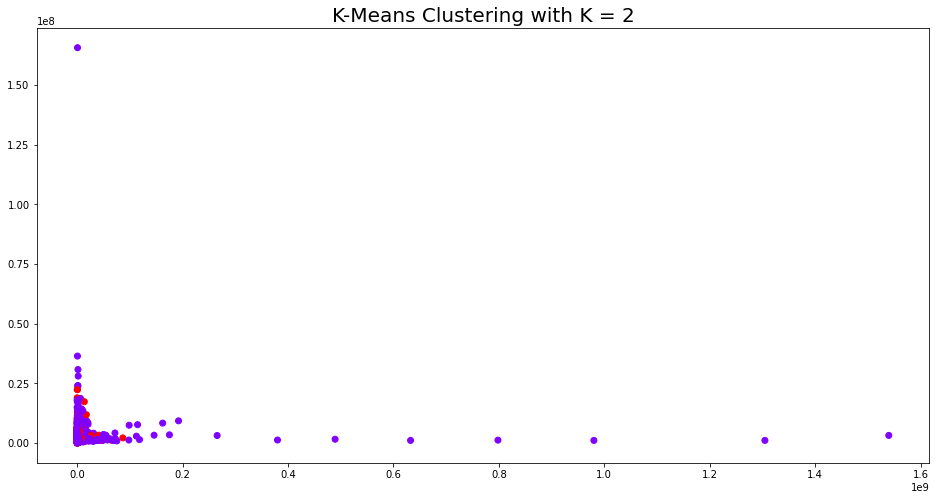

In [488]:
# let's use kmeans to cluster the data
from sklearn.cluster import KMeans

# let's create a kmeans object
kmeans = KMeans(n_clusters=2, random_state=0, max_iter=600, init='k-means++')

# fitting the model to the training data
kmeans.fit(loan_train_ind)

# let's visualize the kmeans clusters

# predcting the labels for the clusters
label = kmeans.fit_predict(loan_train_ind)

#Getting unique labels
u_labels = np.unique(label)

#plotting the results with k as 2 clusters
plt.figure(figsize=(16, 8))
plt.scatter(loan_train_ind['Maximum_Open_Credit'], loan_train_ind['Annual_Income'], c=label, cmap='rainbow')
plt.title('K-Means Clustering with K = 2', color='black', fontsize=20)
plt.show()

Our kmeans clustering model has been highly affected by outliers. However, there are two distinct classes which will be visualized using a 3D cluster plot.

In [ ]:
# 3D kmeans cluster plot
clusterplot3D('Maximum_Open_Credit', 'Annual_Income', 'Term', 'Clusters', loan_train_ind, '3D Cluster Plot')


In [490]:
# calculate silhoutte score
from sklearn.metrics import silhouette_score

# Calculate Silhoutte Score
score = silhouette_score(loan_train_ind, kmeans.labels_, metric='euclidean')

# Print the score
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.987


The silhoutte score of 0.987 implies that the clusters are very dense and nicely separated.

<b>ii) Silhouette Method</b>

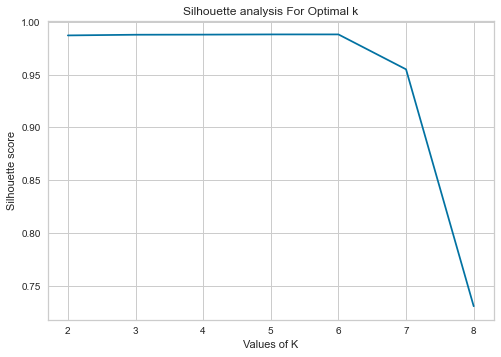

In [497]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
     # initialise kmeans
     kmeans = KMeans(n_clusters=num_clusters)
     kmeans.fit(loan_train_ind)
     cluster_labels = kmeans.labels_
 
     # silhouette score
     silhouette_avg.append(silhouette_score(loan_train_ind, cluster_labels))
     

# plotting results
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

Silhoutte identifies 6 as the optimal value of k.

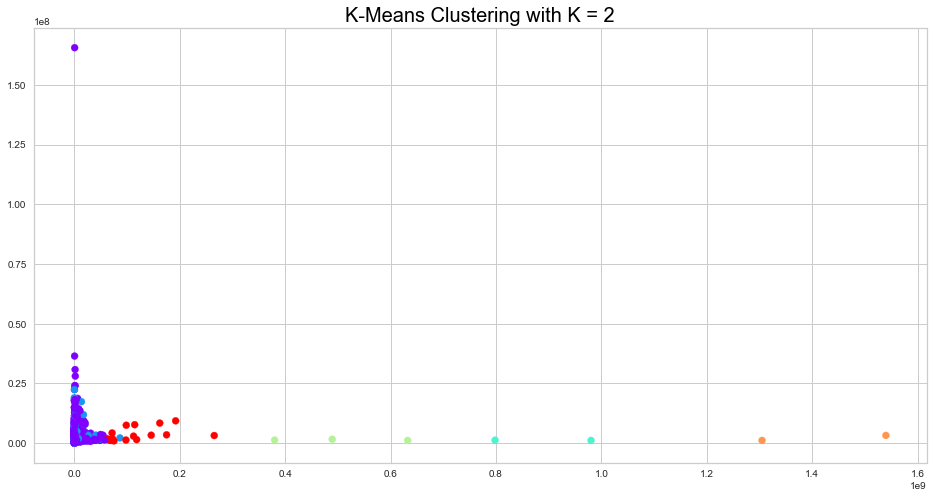

In [498]:
# let's create a kmeans object with 6 clusters
kmeans = KMeans(n_clusters=6, random_state=0, max_iter=600, init='k-means++')

# fitting the model to the training data
kmeans.fit(loan_train_ind)

# let's visualize the kmeans clusters

# predcting the labels for the clusters
label = kmeans.fit_predict(loan_train_ind)

#Getting unique labels
u_labels = np.unique(label)

#plotting the results with k as 2 clusters
plt.figure(figsize=(16, 8))
plt.scatter(loan_train_ind['Maximum_Open_Credit'], loan_train_ind['Annual_Income'], c=label, cmap='rainbow')
plt.title('K-Means Clustering with K = 2', color='black', fontsize=20)
plt.show()

The clusters are still densely and closely grouped together with outliers having different clusters as well.

In [499]:
# Calculate Silhoutte Score
score = silhouette_score(loan_train_ind, kmeans.labels_, metric='euclidean')

# Print the score
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.988


This kmeans model gives a better silhoutte score of 0.988.

### Heirarchical Clustering

In [506]:
# normalize data
from sklearn.preprocessing import normalize
data_scaled = normalize(loan_train_ind)

# fit hierarchical clustering model to the data with 
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

MemoryError: Unable to allocate 27.4 GiB for an array with shape (3680004945,) and data type float64

### DBscan Clustering Model

In [516]:
# finding the value of eps using kneighbours

from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(loan_train_ind) # fitting the data to the object
distances,indices=nbrs.kneighbors(loan_train_ind) # finding the nearest neighbours

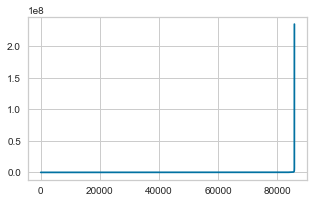

In [517]:
# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showing the plot

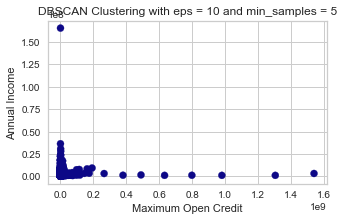

In [520]:
# let's import dbscan
from sklearn.cluster import DBSCAN

# let's create a dbscan object

# min_samples = 2*data_dimensions
dbscan = DBSCAN(eps=0.1, min_samples=32)

dbscan = DBSCAN(eps=0.1, min_samples=32).fit(loan_train_ind)

# let's visualize the dbscan clusters
dbscan.labels_

# Plot the clusters
plt.scatter(loan_train_ind['Maximum_Open_Credit'], loan_train_ind['Annual_Income'], c=dbscan.labels_, cmap="plasma", s=50)
plt.xlabel("Maximum Open Credit")  # X-axis label
plt.title("DBSCAN Clustering with eps = 10 and min_samples = 5")  # Plot title
plt.ylabel("Annual Income")  # Y-axis label
plt.show()  # showing the plot